In [23]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem=Memory("./mycache")

@mem.cache
def get_data():
    data=load_svmlight_file("D:\Ipython_data\housing_scale.txt")
    return data[0],data[1]
x,y=get_data()

import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=0)

In [28]:
import numpy as np
import numpy 
class LinearRegressionByMyself(object):
    def __init__(self,Learning_rate=0.001,epoch=8):
        self.Learning_rate=Learning_rate
        self.epoch=epoch
        
    def fit(self,x,y):
        self.w=np.zeros(1+x.shape[1])
        self.cost_list=[]
        self.row=x.shape[0]
        
        for i in range(self.epoch):
            output=self.Regression_input(x)
            error=(y-output)
            self.w[1:]+=self.Learning_rate*x.T.dot(error)
            self.w[0]+=self.Learning_rate*error.sum()
            cost=(error**2).sum()/2.0
            self.cost_list.append(cost)
        return self
    
    def Regression_input(self,x):
        return x.dot(self.w[1:])+self.w[0]


In [25]:
model=LinearRegressionByMyself()
model.fit(x_train,y_train)
model2=LinearRegressionByMyself()
model2.fit(x_test,y_test)

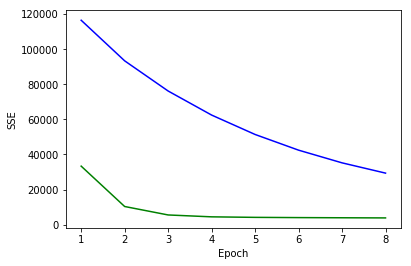

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,model.epoch+1),model.cost_list,'b-',range(1,model2.epoch+1),model2.cost_list,'g-')
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()